# Compulsory Assignment 1 - Pandas and visualizations

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


---
## Loading and exploring the dataset

__1. Load the dataset named `airbnb.csv` and store it in a dataframe called `raw_df`. Use the column named `ìd` as the index column for the dataframe__

In [2]:
# Insert your code below
raw_df = pd.read_csv(r"assets\airbnb.csv")
raw_df = raw_df.set_index('id')

# ======================

__2. Print the first `five` rows of the dataframe__

In [3]:
# Insert your code below
# ======================

raw_df.head(5)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,state,city
id,,,,,,,,,,,,,,,
183319,Panoramic Ocean View Venice Beach,867995,Barbara X,Venice,33.99211,-118.47600,Entire home/apt,152,30,3,2,0,0,CA,Los Angeles
109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,1,139,0,CA,Los Angeles
51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,Atwater Village,34.12206,-118.26783,Entire home/apt,75,30,138,2,224,0,CA,Los Angeles
184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,Venice,33.97487,-118.46312,Entire home/apt,125,30,30,1,0,0,CA,Los Angeles
51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,Mar Vista,34.00389,-118.44126,Entire home/apt,189,3,378,1,348,41,CA,Los Angeles


__3. How many unique values exist in each of the columns `state` and `city`?__

In [4]:
# Insert your code below
# ======================

unique_state = raw_df['state'].nunique() # .nunique() returns number of unique values.
unique_city = raw_df['city'].nunique()

print("Number of unique cities:", unique_city)
print("Number of unique cities:", unique_state)

Number of unique cities: 31
Number of unique cities: 19


__4. Identify missing (NaN) values in each of the columns in the dataset__

In [5]:
# Insert your code below
# ======================

print(raw_df.isnull().sum()) # .isnull() finds all nan-values while .sum() counts them.

name                                19
host_id                              0
host_name                         1144
neighbourhood                      712
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
state                                0
city                                 0
dtype: int64


__5. Create a copy of `raw_df` named `df`. Remove any rows containing NaN values in the new dataframe. What is the shape of `df` before and after removing the NaN values?__

In [6]:
# Insert your code below
# ======================
df = raw_df.copy()
df = df.dropna() # drops rows if a nan value is present
print("Dataframe shape before removing NaN values:", raw_df.shape)
print("Dataframe shape after removing NaN values:", df.shape)

Dataframe shape before removing NaN values: (325858, 15)
Dataframe shape after removing NaN values: (323983, 15)


__6. Which `room_type`, `state` and `city` is the most popular (by number of instances)? Print the name and count of each__

Hint: The output should look something like this:
```python
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
Column: [col], Most popular: [name], Count: [count]
```

In [7]:
# Insert your code below
# ======================
for feature in ['room_type', 'state', 'city']:
    count = df[feature].value_counts()[0] # .value_counts() returns number of occurences of a each unique instance.
    name = df[feature].value_counts().index[0] # .index returns the unique instance variables.
    print(f"Column: {feature}, Most popular: {name}, Count: {count}")

q = df['room_type'].value_counts()

Column: room_type, Most popular: Entire home/apt, Count: 241433
Column: state, Most popular: CA, Count: 127206
Column: city, Most popular: Los Angeles, Count: 91600


__7. What is the average and median `price` for a listing?__

In [8]:
# Insert your code below
# ======================

median = df['price'].median() # compute median of th column 'price' in the dataframe
average = df['price'].mean() # compute mean of th column 'price' in the dataframe

print(f"The average price for an AirBnb listing is {average:.2f} USD. Meanwhile, the median price for a listing is {median:.2f} USD.")


The average price for an AirBnb listing is 285.13 USD. Meanwhile, the median price for a listing is 159.00 USD.


__8. What is the average price for the states `CA`, `FL` and `NY`?__

Hint: The output should look something like this:
```python
State: [col], Average price: [price]
State: [col], Average price: [price]
State: [col], Average price: [price]
```

In [9]:
# Insert your code below
# ======================

for state in ['CA', 'FL', 'NY']:
    current_state = df[df['state'] == state] # create new dataframe with entries which has the specified state name in the 'state' column.
    average_price = current_state['price'].mean()
    print(f"State: {state}, Average price: {average_price:.2f}")

State: CA, Average price: 288.40
State: FL, Average price: 241.99
State: NY, Average price: 197.22


__9. Create a new dataframe called `df_beach` containing all listings with "beach" in the `name`. Print out the shape of `beach_df`__

The filtering should not be case sensitive, meaning that names containing `beach`, `Beach`, `BeAcH` etc. all should be included


In [10]:
# Insert your code below
# ======================

df_beach = df[df['name'].str.contains('beach', case=False)] # create new dataframe with entries which has the word beach in the 'name' column.

---

## Visualizing the dataset

__10. Create plot with 2 vertical axes and one horizontal axes. The plot should display a barchart containing the `count` of the `10 most popular` states and cities, each in its own subplot. The bars should be sorted in descending order.__

Use `df` in all tasks in this section

Hint: It is recommended to use the `Barplot` function built into Seaborn for barcharts.

The output should look something like this:

<img src="assets/ex10.png"
     alt="Barchart example"/>

PS: Disregard the color scheme of the example image.

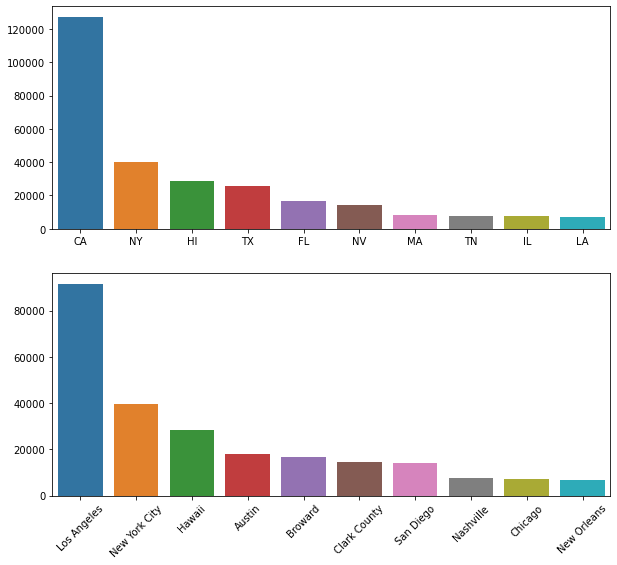

In [11]:
# Insert your code below
# ======================
most_popular_states = df['state'].value_counts()[:10] # get the 10 most popular states
most_popular_cities = df['city'].value_counts()[:10] # get the 10 most popular cities

barplot, axes = plt.subplots(2, 1, figsize=(10, 9)) # Create a 2x1 subplot

sns.barplot(x=most_popular_states.index, y=most_popular_states.values, ax=axes[0]) # Create a barplot where the x-labels are the state names, while the bar corresponds to the number of occurences.
sns.barplot(x=most_popular_cities.index, y=most_popular_cities.values, ax=axes[1])  # Create a barplot where the x-labels are the city names, while the bar corresponds to the number of occurences.
axes[1].set_xticklabels(labels=most_popular_cities.index,rotation=45) # rotate the x-labels
plt.show()


__11. Create a scatterplot with the longitude and latitude of the listings in `df`. Longitude should be on the x-axis and latitude on the y-axis.__ 

The output should look something like this:

<img src="assets/ex11.png"
     alt="Scatterplot example"/>

PS: Disregard the color scheme of the example image.

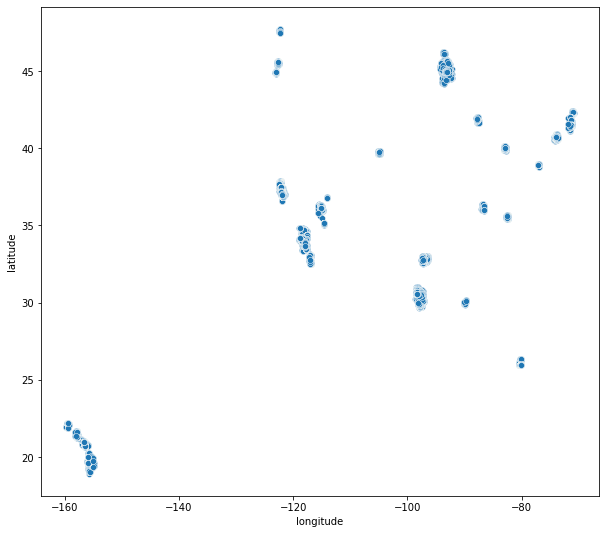

In [12]:
# Insert your code below
# ======================
scatter, axes_scatter = plt.subplots(figsize=(10,9))
sns.scatterplot(x=df['longitude'], y=df['latitude'], ax=axes_scatter) # creates the scatterplot
plt.show()

__12. Create a matrix containing the correlations between the different columns in `df`. Plot it as a heatmap using Seaborn or similar. What does the plot tell you about correlations? Which columns are the most correlated to `price`?__

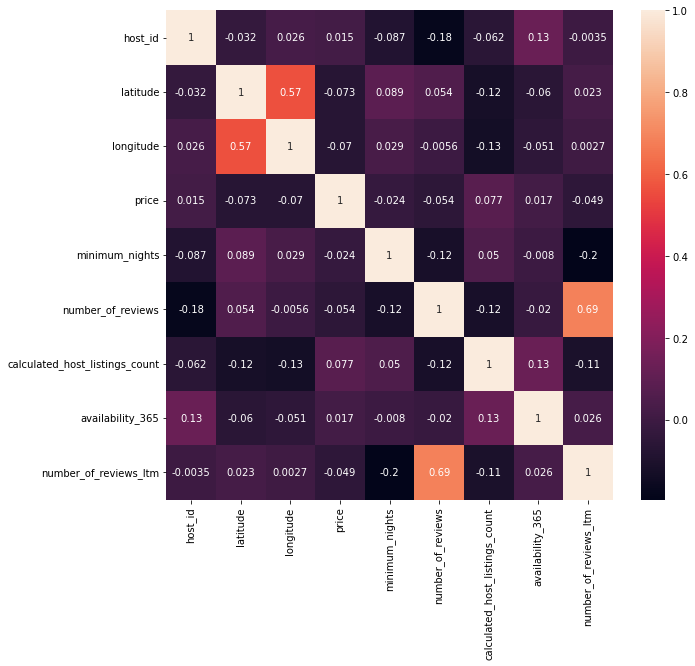

In [13]:
# Insert your code below
# ======================

correlation_matrix = df.corr() # creates the correlation matrix for the features.

heatmap, ax_heatmap = plt.subplots(figsize=(10,9))
sns.heatmap(correlation_matrix, annot=True) # creates the heatmap
plt.show()

The correlation heatmap shows us in which degree the different features are correlated with one another. *calculated_host_listings_count* is the most correlated column to the *price* column.